# 1A.data - visualisation des données - correction

Correction.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Exercice 1 : écart entre les mariés

On reprend d'abord le code qui permet de récupérer les données.

In [4]:
from urllib.error import URLError
import pyensae
from pyensae.datasource import dBase2df, DownloadDataException
files = ["etatcivil2012_nais2012_dbase.zip",
         "etatcivil2012_dec2012_dbase.zip",
         "etatcivil2012_mar2012_dbase.zip" ]

try:
    pyensae.download_data(files[-1], 
                          website='http://telechargement.insee.fr/fichiersdetail/etatcivil2012/dbase/')
except (DownloadDataException, URLError, TimeoutError):
    # backup plan
    pyensae.download_data(files[-1], website="xd")

df = dBase2df("mar2012.dbf")
print(df.shape, df.columns)
df.head()

(246123, 16) Index(['ANAISH', 'DEPNAISH', 'INDNATH', 'ETAMATH', 'ANAISF', 'DEPNAISF',
       'INDNATF', 'ETAMATF', 'AMAR', 'MMAR', 'JSEMAINE', 'DEPMAR', 'DEPDOM',
       'TUDOM', 'TUCOM', 'NBENFCOM'],
      dtype='object')


,ANAISH,DEPNAISH,INDNATH,ETAMATH,ANAISF,DEPNAISF,INDNATF,ETAMATF,AMAR,MMAR,JSEMAINE,DEPMAR,DEPDOM,TUDOM,TUCOM,NBENFCOM
0,1982,75,1,1,1984,99,2,1,2012,01,1,29,99,9,,N
1,1956,69,2,4,1969,99,2,4,2012,01,3,75,99,9,,N
2,1982,99,2,1,1992,99,1,1,2012,01,5,34,99,9,,N
3,1985,99,2,1,1987,84,1,1,2012,01,4,13,99,9,,N
4,1968,99,2,1,1963,99,2,1,2012,01,6,26,99,9,,N


Puis on effectue les opérations suggérées par l'énoncé.

In [5]:
df["ANAISH"] = df.apply (lambda r:  int(r["ANAISH"]), axis=1)
df["ANAISF"] = df.apply (lambda r:  int(r["ANAISF"]), axis=1)
df["differenceHF"] = df.ANAISH - df.ANAISF
df["nb"] = 1
dist = df[["nb","differenceHF"]].groupby("differenceHF", as_index=False).count()
import pandas
pandas.concat([dist.head(n=2), dist.tail(n=3)])

,differenceHF,nb
0,-59,6
1,-56,1
97,50,1
98,56,1
99,59,1


## Exercice 2 : graphe de la distribution avec pandas

L'exemple est suggéré par le paragraphe : [bar plots](http://pandas.pydata.org/pandas-docs/stable/visualization.html#bar-plots).

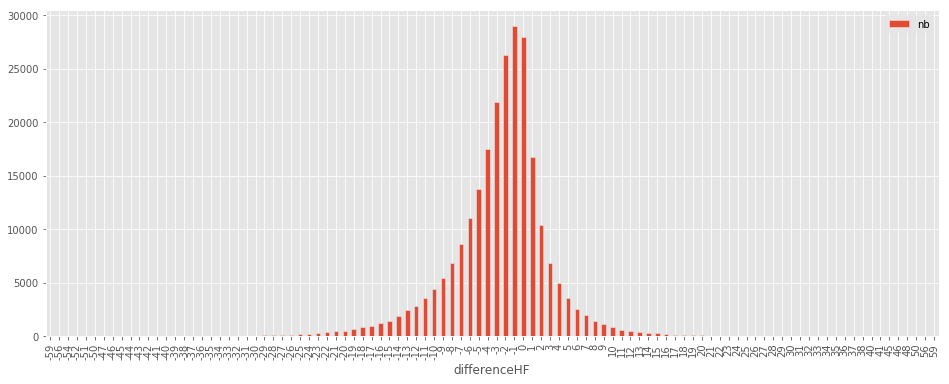

In [6]:
dist.plot (kind="bar", y="nb", x="differenceHF", figsize=(16,6))

Mais on pouvait directement dessiner la distribution sans passer par un ``group by`` comme suggérée par le paragraphe [histograms](http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms).

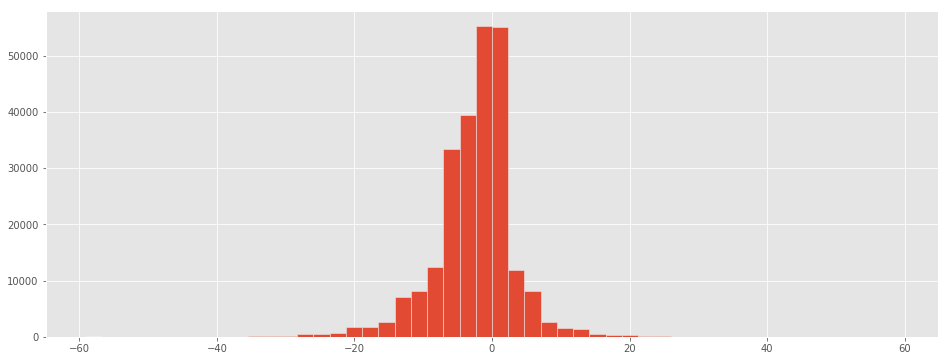

In [7]:
df["differenceHF"].hist(figsize=(16,6), bins=50)

Ou encore la distribution lissée (voir [density plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#density-plot)) (cela prend une minute environ) :

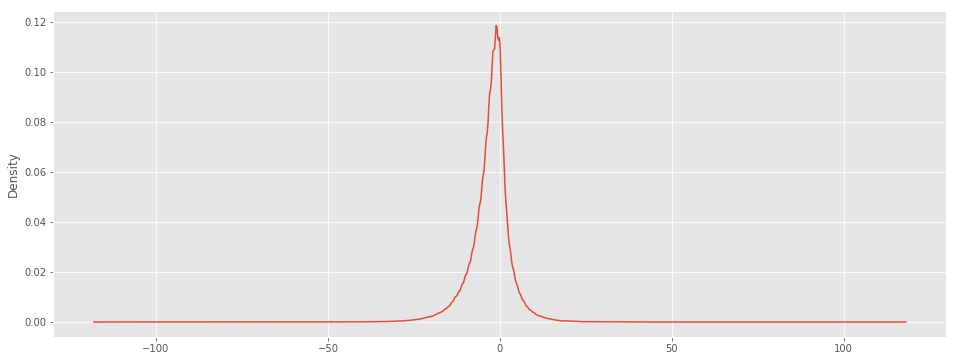

In [8]:
df["differenceHF"].plot(figsize=(16,6), kind="kde")

Le second graphique peut être obtenu en écrivant :

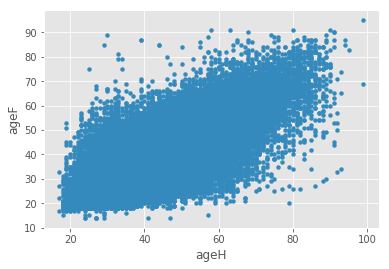

In [9]:
df["ageH"] = -df.ANAISH + 2012
df["ageF"] = -df.ANAISF + 2012
df.plot(x="ageH", y="ageF", kind="scatter")

Il y a trop de points pour que cela soit lisible. C'est pourquoi, on utilise souvent une [heatmap](http://pandas.pydata.org/pandas-docs/stable/visualization.html#hexagonal-bin-plot).

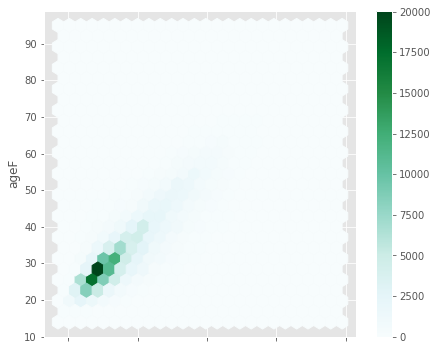

In [10]:
df.plot(kind='hexbin', x="ageH", y="ageF", gridsize=25, figsize=(7,6))

## Exercice 3 : distribution des mariages par jour

On veut obtenir un graphe qui contient l'histogramme de la distribution du nombre de mariages par jour de la semaine et d'ajouter une seconde courbe correspond avec un second axe à la répartition cumulée.

https://github.com/pydata/pandas/issues/11111

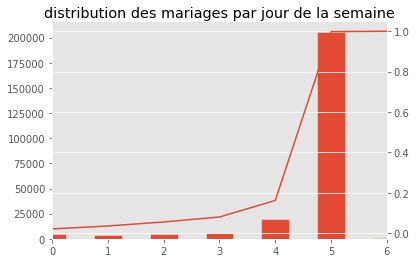

In [11]:
# ce code échoue pour pandas 0.17.rc1, prendre 0.16.2 ou 0.17.rc2
df["nb"] = 1
dissem = df[["JSEMAINE","nb"]].groupby("JSEMAINE",as_index=False).sum()
total = dissem["nb"].sum()
repsem = dissem.cumsum() 
repsem["nb"] /= total

ax = dissem["nb"].plot(kind="bar")
repsem["nb"].plot(ax=ax, secondary_y=True)
ax.set_title("distribution des mariages par jour de la semaine")

## Exercice 4 : dessin d'un graphe avec networkx

On construit un graphe aléatoire, ses 20 arcs sont obtenus en tirant 20 fois deux nombres entiers entre 1 et 10.  Chaque arc doit avoir une épaisseur aléatoire. 

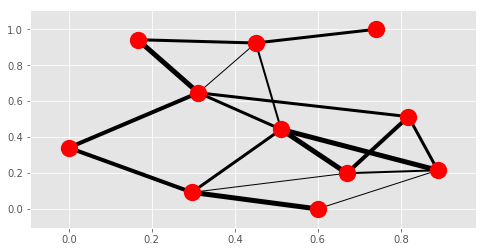

In [15]:
import random
import networkx as nx
G=nx.Graph()
edge_width = [ ]
for i in range(20) :
    G.add_edge ( random.randint(0,10),  random.randint(0,10) )
    edge_width.append( random.randint( 1,5) )
    
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,4))

pos=nx.spring_layout(G) 
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos,width=edge_width,ax=ax)